In [7]:
# Se importan las librerias
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# Logistic regresion

In [8]:
# división del train/test
df = pd.read_csv("data/processed/train.csv", index_col=0)


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["target"], axis=1), df['target'], test_size=0.2, random_state=42)

In [9]:
scaler_train = StandardScaler()
scaler_train.fit_transform(X_train)
scaler_test = StandardScaler()
scaler_test.fit_transform(X_test)

array([[-0.02032241,  1.73381223, -0.10195827, ..., -0.07958031,
        -0.06170823, -0.68245166],
       [-0.02097665,  0.6539032 , -0.10195827, ..., -0.65936281,
        -0.06170823,  2.07493717],
       [-0.01832606, -1.23593759, -0.10195827, ..., -0.46610198,
        -0.06170823,  1.15580756],
       ...,
       [-0.01940126,  0.04645438, -0.10195827, ...,  0.50020218,
        -0.06170823,  1.15580756],
       [-0.02056705,  1.32884634, -0.10195827, ...,  0.30694135,
        -0.06170823, -0.68245166],
       [-0.01866891,  0.24893732, -0.10195827, ...,  0.11368052,
        -0.06170823, -0.68245166]])

In [10]:
# Se importan las librerias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [13]:
lr.classes_

array([0, 1])

In [14]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))

Accuracy 0.8613780413003476
AUC 0.7221801766382566


In [16]:
df_ft = pd.DataFrame({'features':X_train.columns, 'importances':lr.coef_[0]}).sort_values('importances', ascending=False)
df_ft

,features,importances
2,NumberOfTime30-59DaysPastDueNotWorse,0.586728
6,NumberOfTimes90DaysLate,0.540583
7,NumberOfDependents,0.088607
5,NumberOfOpenCreditLinesAndLoans,0.015805
0,RevolvingUtilizationOfUnsecuredLines,0.000041
3,DebtRatio,-0.000012
4,MonthlyIncome,-0.000013
1,age,-0.014000


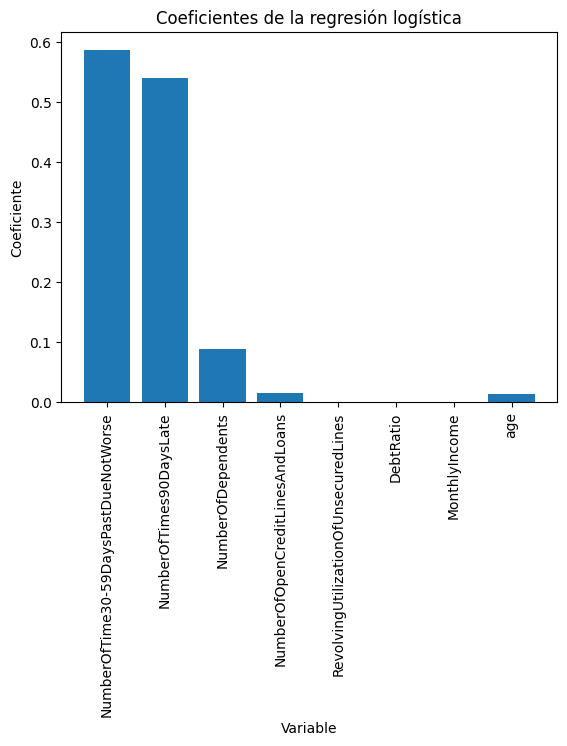

In [17]:
# Crear el diagrama de barras de los coeficientes
plt.bar(df_ft['features'], np.abs(df_ft['importances']))

# Configurar etiquetas y título
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes de la regresión logística')

# Mostrar los nombres de las variables en el eje x
plt.xticks(df_ft["features"], rotation='vertical')

# Mostrar el diagrama de barras
plt.show()

In [18]:
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy') # Me da el accuracy de cada split de 10, No reentrena el modelo, sino que cada vez que obtiene el accuracy es un nuevo modelo

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Sirve para obtener una métrica más exacta
print(cv_results)
print(msg)

[0.86198671 0.86147555 0.86028284 0.86437212 0.86011246 0.85755665
 0.85755665 0.85602317 0.87203953 0.86692793]
Logistic Regression: 0.861833 (0.004609)


In [19]:
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='roc_auc') # Me da el accuracy de cada split de 10, No reentrena el modelo, sino que cada vez que obtiene el accuracy es un nuevo modelo

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Sirve para obtener una métrica más exacta
print(cv_results)
print(msg)

[0.79948574 0.79616088 0.77184335 0.79561701 0.81271933 0.79030901
 0.78796524 0.80049075 0.82939229 0.81336852]
Logistic Regression: 0.799735 (0.015066)


## Matriz de confusión

In [20]:
c_matrix = confusion_matrix(y_test, y_pred)

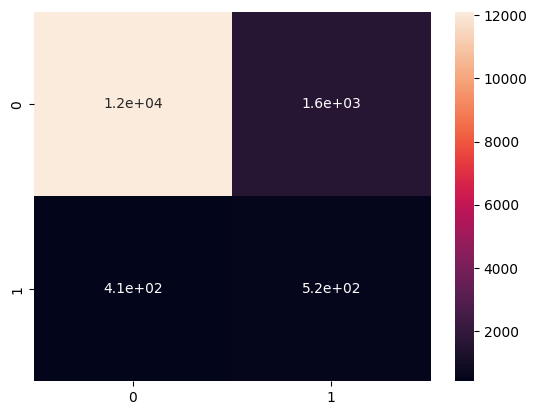

In [21]:
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

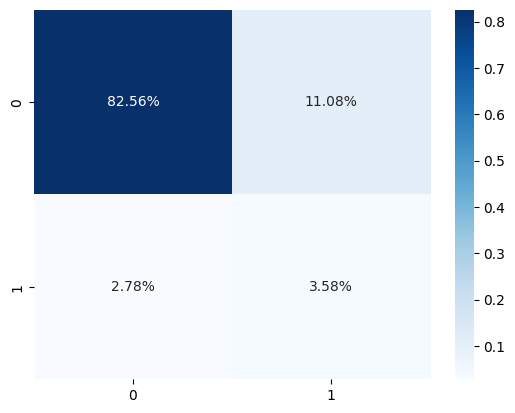

In [22]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');

# Decisión tree

In [23]:
# división del train/test
df = pd.read_csv("data/processed/train.csv", index_col=0)


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(["target"], axis=1), df['target'], test_size=0.2, random_state=42)

In [24]:
# Se importan las librerias
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [25]:
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [26]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberOfDependents'],
      dtype='object')

In [27]:
pd.DataFrame({'features':X_train.columns, 'importances':dtc.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
0,RevolvingUtilizationOfUnsecuredLines,0.358211
3,DebtRatio,0.154362
4,MonthlyIncome,0.124820
1,age,0.116182
2,NumberOfTime30-59DaysPastDueNotWorse,0.076467
5,NumberOfOpenCreditLinesAndLoans,0.073276
6,NumberOfTimes90DaysLate,0.067315
7,NumberOfDependents,0.029367


In [28]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))

Accuracy 0.9026102364887889
AUC 0.6023337639300373


In [30]:
# Se importan las librerias
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [40]:
dtc = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [41]:
X_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberOfDependents'],
      dtype='object')

In [42]:
pd.DataFrame({'features':X_train.columns, 'importances':dtc.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
0,RevolvingUtilizationOfUnsecuredLines,0.605819
2,NumberOfTime30-59DaysPastDueNotWorse,0.200175
6,NumberOfTimes90DaysLate,0.194006
1,age,0.000000
3,DebtRatio,0.000000
4,MonthlyIncome,0.000000
5,NumberOfOpenCreditLinesAndLoans,0.000000
7,NumberOfDependents,0.000000


In [43]:
y_pred = dtc.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [44]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("AUC", roc_auc_score(y_test, y_pred))

Accuracy 0.6727322292646357
AUC 0.7598181899025074


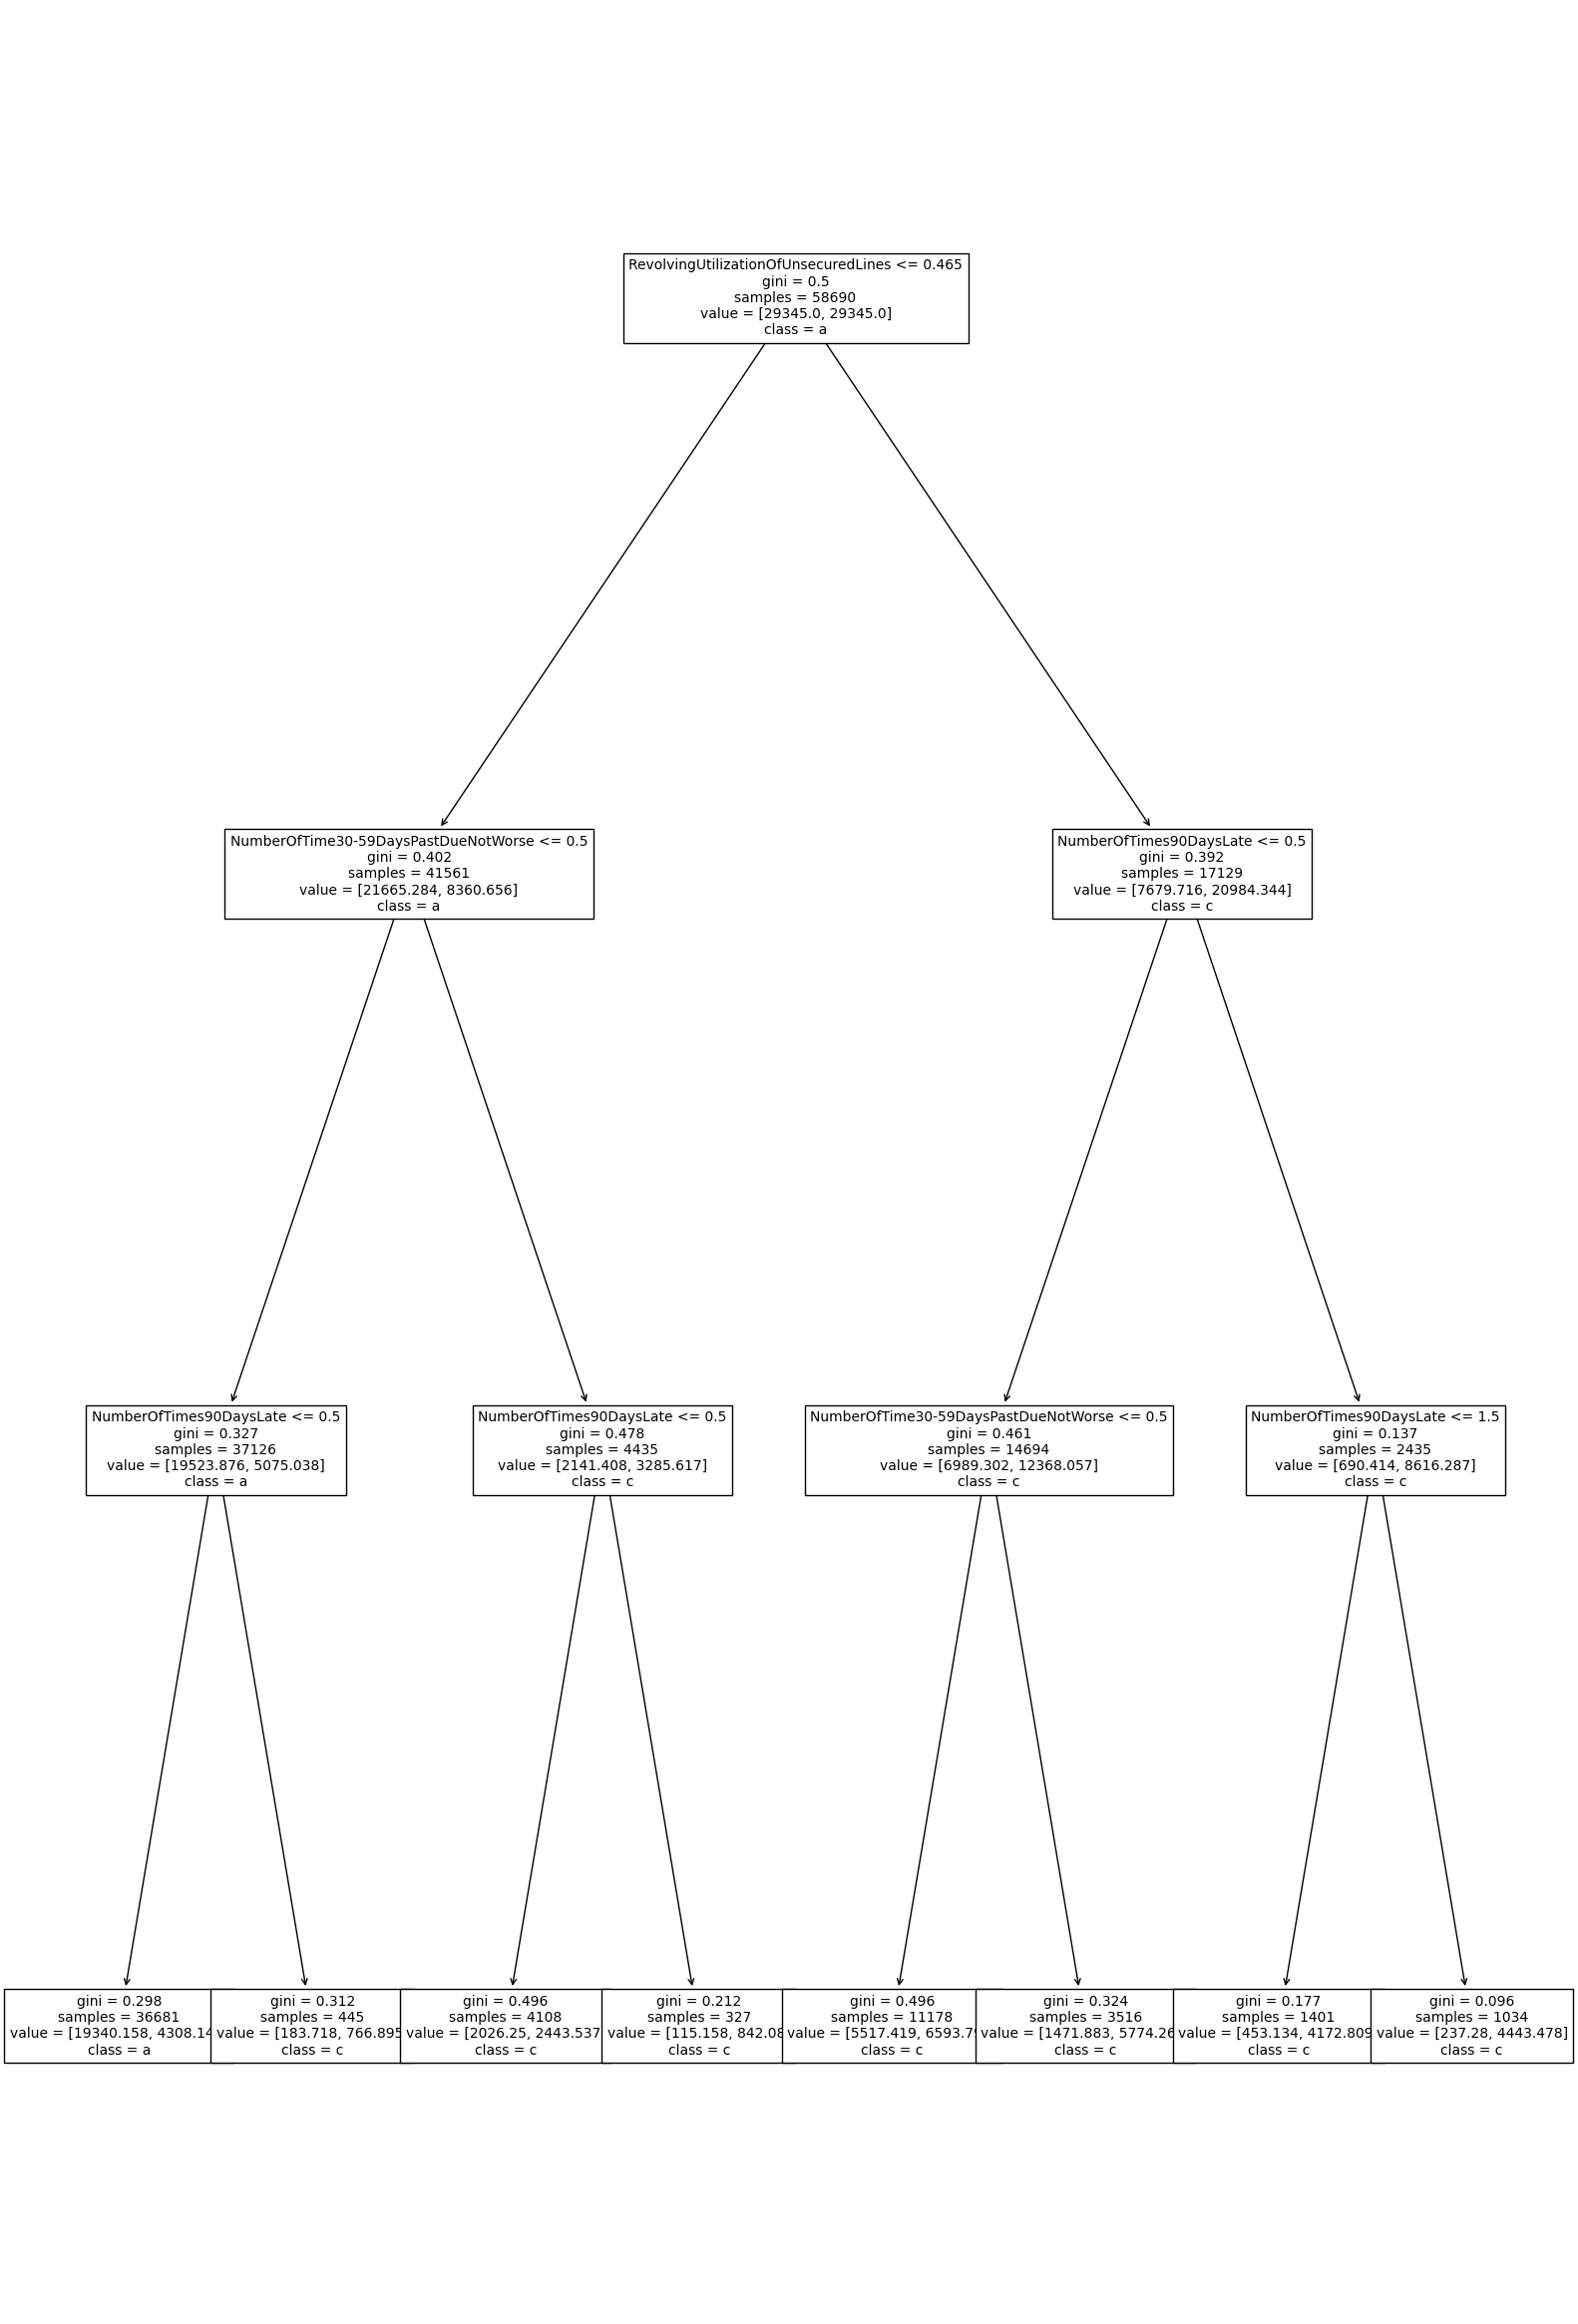

In [45]:
plt.figure(figsize=(20,30))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10);

In [46]:
name='Decision Tree'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(dtc, X_train, y_train, cv=kfold, scoring='roc_auc') # Me da el accuracy de cada split de 10, No reentrena el modelo, sino que cada vez que obtiene el accuracy es un nuevo modelo

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Sirve para obtener una métrica más exacta
print(cv_results)
print(msg)

[0.81622616 0.81905884 0.80562016 0.81946768 0.82632753 0.80866312
 0.81222032 0.80904052 0.83580159 0.82738854]
Decision Tree: 0.817981 (0.009137)


In [47]:
# param_grid = {
#     'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40],
#     'l1_ratio': np.arange(0, 1, 0.01)
# }

# decisiontree = DecisionTreeClassifier()

# grid_search = GridSearchCV(decisiontree,
#                            param_grid,
#                            cv=5,
#                            scoring='r2',
#                            n_jobs=-1
#                            )

# grid_search.fit(X_train, y_train)

## Tratamiento de hiperparámetros

In [48]:
# Hiperparámetros


# KNN

# SVM

# Ensembles